# Wine Qualtiy Prediction using Linear Regression
🍷 Exciting News! 🍷 I have built a Machine Learning model using linear regression to predict the quality of wine! 📊🍇 With this model, we can analyze various features of the wine and accurately estimate its quality. By leveraging the power of linear regression, we can make predictions based on historical data and uncover hidden patterns. 📈🔍 This model not only helps in understanding the factors influencing wine quality but also enables us to make informed decisions in the wine industry. 🍾📚 Let's toast to the wonders of data science and its ability to enhance our understanding of the intricate world of wine! 🥂 #MachineLearning 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\panch\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/WhiteWineQuality.csv", sep=";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regression.predict(X_test)

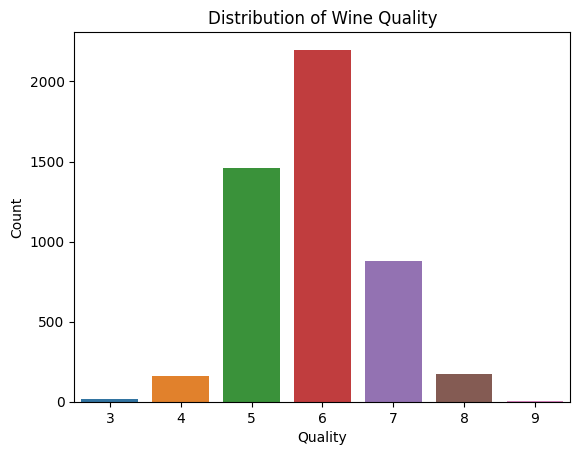

In [9]:
sns.countplot(x='quality', data=df)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

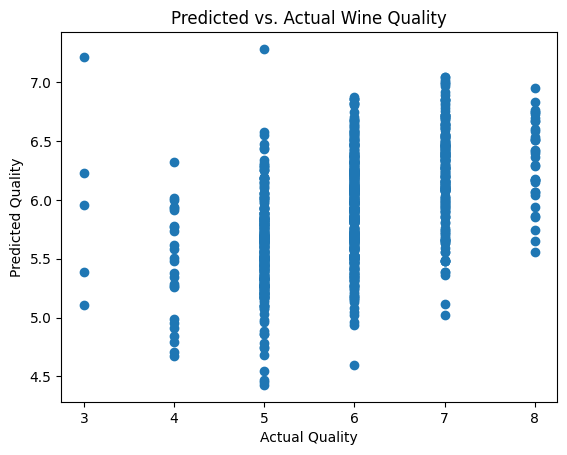

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs. Actual Wine Quality')
plt.show()

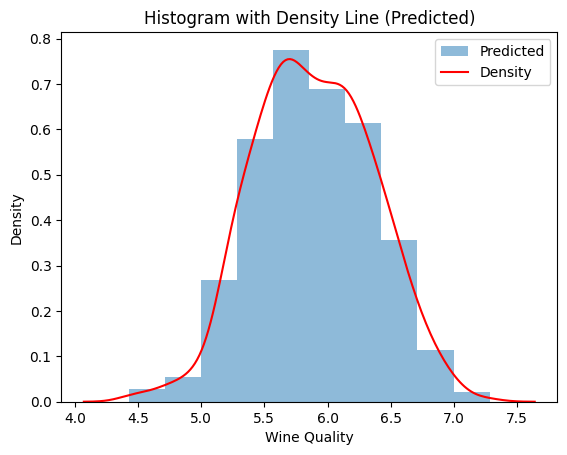

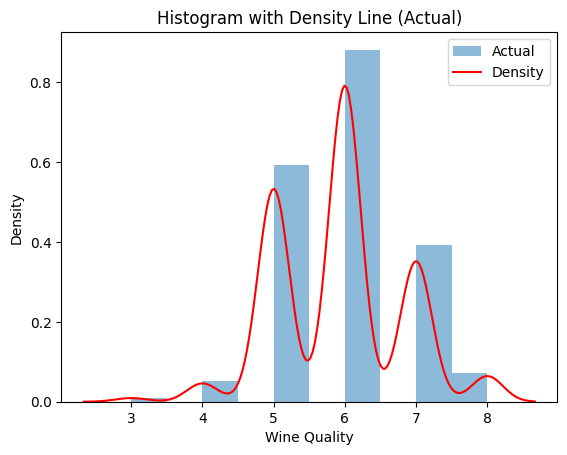

In [11]:
# Plot histogram with density line for predicted values
plt.hist(y_pred, bins=10, density=True, alpha=0.5, label='Predicted')
sns.kdeplot(y_pred, color='r', label='Density')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.title('Histogram with Density Line (Predicted)')
plt.legend()
plt.show()

# Plot histogram with density line for actual values
plt.hist(y_test, bins=10, density=True, alpha=0.5, label='Actual')
sns.kdeplot(y_test, color='r', label='Density')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.title('Histogram with Density Line (Actual)')
plt.legend()
plt.show()


In [12]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.2652750042179164


In [13]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Create a table with the metrics
table = [["Mean Squared Error (MSE)", mse],
         ["Root Mean Squared Error (RMSE)", rmse],
         ["Mean Absolute Error (MAE)", mae]]

# Print the table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒════════════════════════════════╤══════════╕
│ Metric                         │    Value │
╞════════════════════════════════╪══════════╡
│ Mean Squared Error (MSE)       │ 0.569025 │
├────────────────────────────────┼──────────┤
│ Root Mean Squared Error (RMSE) │ 0.754337 │
├────────────────────────────────┼──────────┤
│ Mean Absolute Error (MAE)      │ 0.586267 │
╘════════════════════════════════╧══════════╛
